In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The error you’re encountering, ValueError: y should be a 1d array, got an array of shape (2945, 8) instead, is because the SVM model in this case expects the target variable y to be a one-dimensional array (i.e., a single label for each sample). However, it looks like your y variable contains multiple labels (probably a multi-label classification problem).

To address this, you have a couple of options depending on your intended approach:

Single-label Classification: If you want to perform single-label classification, you need to decide on one label column to use as the target variable. For example, if you have a specific label column you want to classify, you can select that.

Multi-label Classification: If you intend to keep the multi-label classification, you'll need to use an algorithm that supports multi-label classification, such as OneVsRestClassifier with SVM.

Features and labels loaded successfully!

Training Linear SVM with SGDClassifier...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


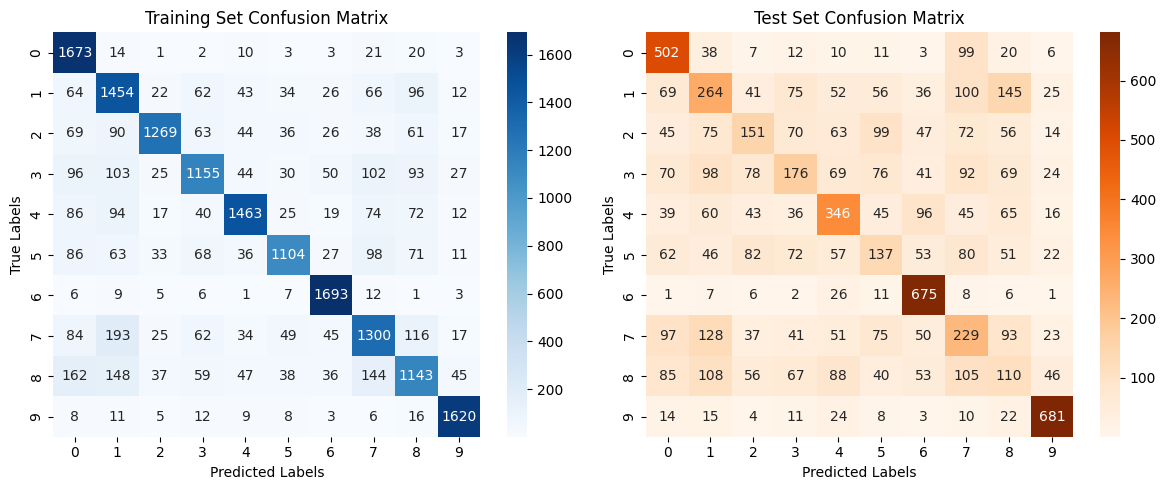


Training Set Performance:
Train Accuracy: 0.7798324995784386
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.72      0.96      0.82      1750
           1       0.67      0.77      0.72      1879
           2       0.88      0.74      0.81      1713
           3       0.76      0.67      0.71      1725
           4       0.85      0.77      0.81      1902
           5       0.83      0.69      0.75      1597
           6       0.88      0.97      0.92      1743
           7       0.70      0.68      0.69      1925
           8       0.68      0.61      0.64      1859
           9       0.92      0.95      0.94      1698

    accuracy                           0.78     17791
   macro avg       0.79      0.78      0.78     17791
weighted avg       0.78      0.78      0.78     17791


Test Set Performance:
Test Accuracy: 0.42892735378966695
Classification Report (Test):
               precision    recall  f1-score   support

   

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Paths to load the features and labels
combined_features_path = '/content/drive/My Drive/Final DataSet/combined_features.npy'
labels_path = '/content/drive/My Drive/Final DataSet/labels.npy'

# Load the saved features and labels
X_features_combined = np.load(combined_features_path)
y = np.load(labels_path)

print("Features and labels loaded successfully!")

# Convert one-hot encoded labels to class indices
y_indices = np.argmax(y, axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features_combined, y_indices, test_size=0.30, random_state=42)

# Feature scaling for SGDClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SGDClassifier as a linear SVM
print("\nTraining Linear SVM with SGDClassifier...")
sgd_svm = SGDClassifier(loss='hinge', random_state=42, max_iter=1000, tol=1e-3)  # 'hinge' loss approximates SVM
sgd_svm.fit(X_train_scaled, y_train)

# Make predictions on both train and test sets
y_train_pred = sgd_svm.predict(X_train_scaled)
y_test_pred = sgd_svm.predict(X_test_scaled)

# Compute confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Visualization of confusion matrices using heatmaps
plt.figure(figsize=(12, 5))

# Heatmap for Training Set
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_indices),
            yticklabels=np.unique(y_indices))
plt.title('Training Set Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Heatmap for Test Set
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y_indices),
            yticklabels=np.unique(y_indices))
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# Print classification reports and accuracies
print("\nTraining Set Performance:")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Classification Report (Train):\n", classification_report(y_train, y_train_pred))

print("\nTest Set Performance:")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))


# **Using InceptionV3**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Features and labels loaded successfully!

Train Accuracy: 1.00
Test Accuracy: 0.90

Train Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2089
           1       1.00      1.00      1.00      2331
           2       1.00      1.00      1.00      2044
           3       1.00      1.00      1.00      2140
           4       1.00      1.00      1.00      2289
           5       1.00      1.00      1.00      1920
           6       1.00      1.00      1.00      2113
           7       1.00      1.00      1.00      2337
           8       1.00      1.00      1.00      2224
           9       1.00      1.00      1.00      2117

    accuracy                           1.00     21604
   macro avg       1.00      1.00      1.00     21604
weighted avg       1.00      1.00      1.00     21604


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99   

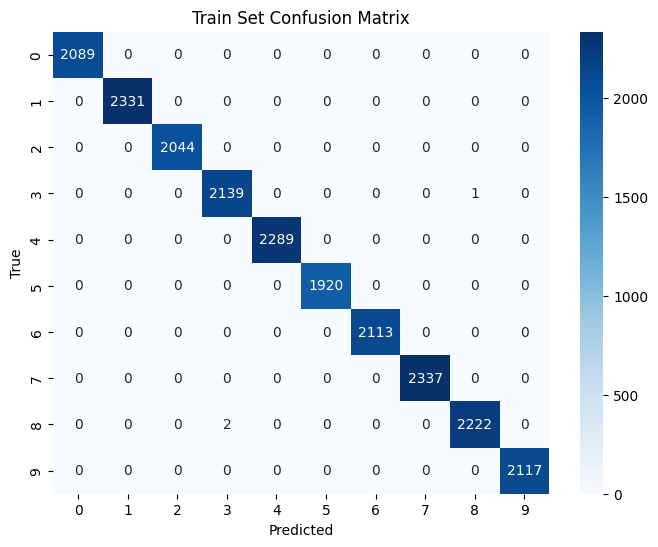


Test Set Confusion Matrix:


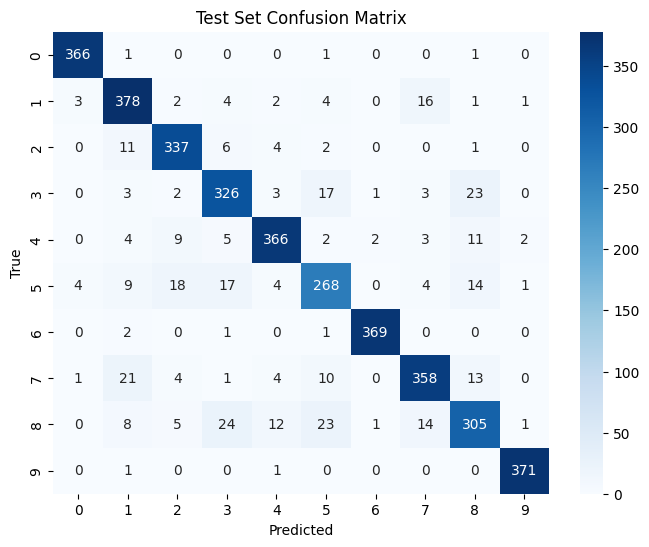

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to load the saved features and labels
inception_train_features_path = '/content/drive/My Drive/Final DataSet/inception_train_features.npy'
inception_test_features_path = '/content/drive/My Drive/Final DataSet/inception_test_features.npy'
train_labels_path = '/content/drive/My Drive/Final DataSet/train_labels.npy'
test_labels_path = '/content/drive/My Drive/Final DataSet/test_labels.npy'

# Load the pre-extracted features and labels
X_train = np.load(inception_train_features_path)
X_test = np.load(inception_test_features_path)
y_train = np.load(train_labels_path)
y_test = np.load(test_labels_path)

print("Features and labels loaded successfully!")

# Scale the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42, C=1.0)  # You can adjust kernel and C parameter
svm_model.fit(X_train_scaled, y_train)

# Evaluate on train and test sets
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Print performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

print("\nTrain Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrices
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display Confusion Matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

print("\nTrain Set Confusion Matrix:")
plot_confusion_matrix(train_conf_matrix, "Train Set Confusion Matrix")

print("\nTest Set Confusion Matrix:")
plot_confusion_matrix(test_conf_matrix, "Test Set Confusion Matrix")
